## To predict whether a person will have diabetes or not.

In [11]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
## Load the data
data=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Basic Checks

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Domain Analysis

## Exploratory data analysis

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

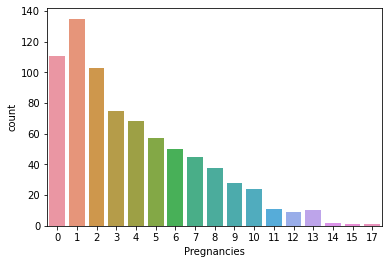

In [8]:
sns.countplot(x='Pregnancies',data=data)\
# Maximum patients have conceived 1 and 0 times

In [9]:
data.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

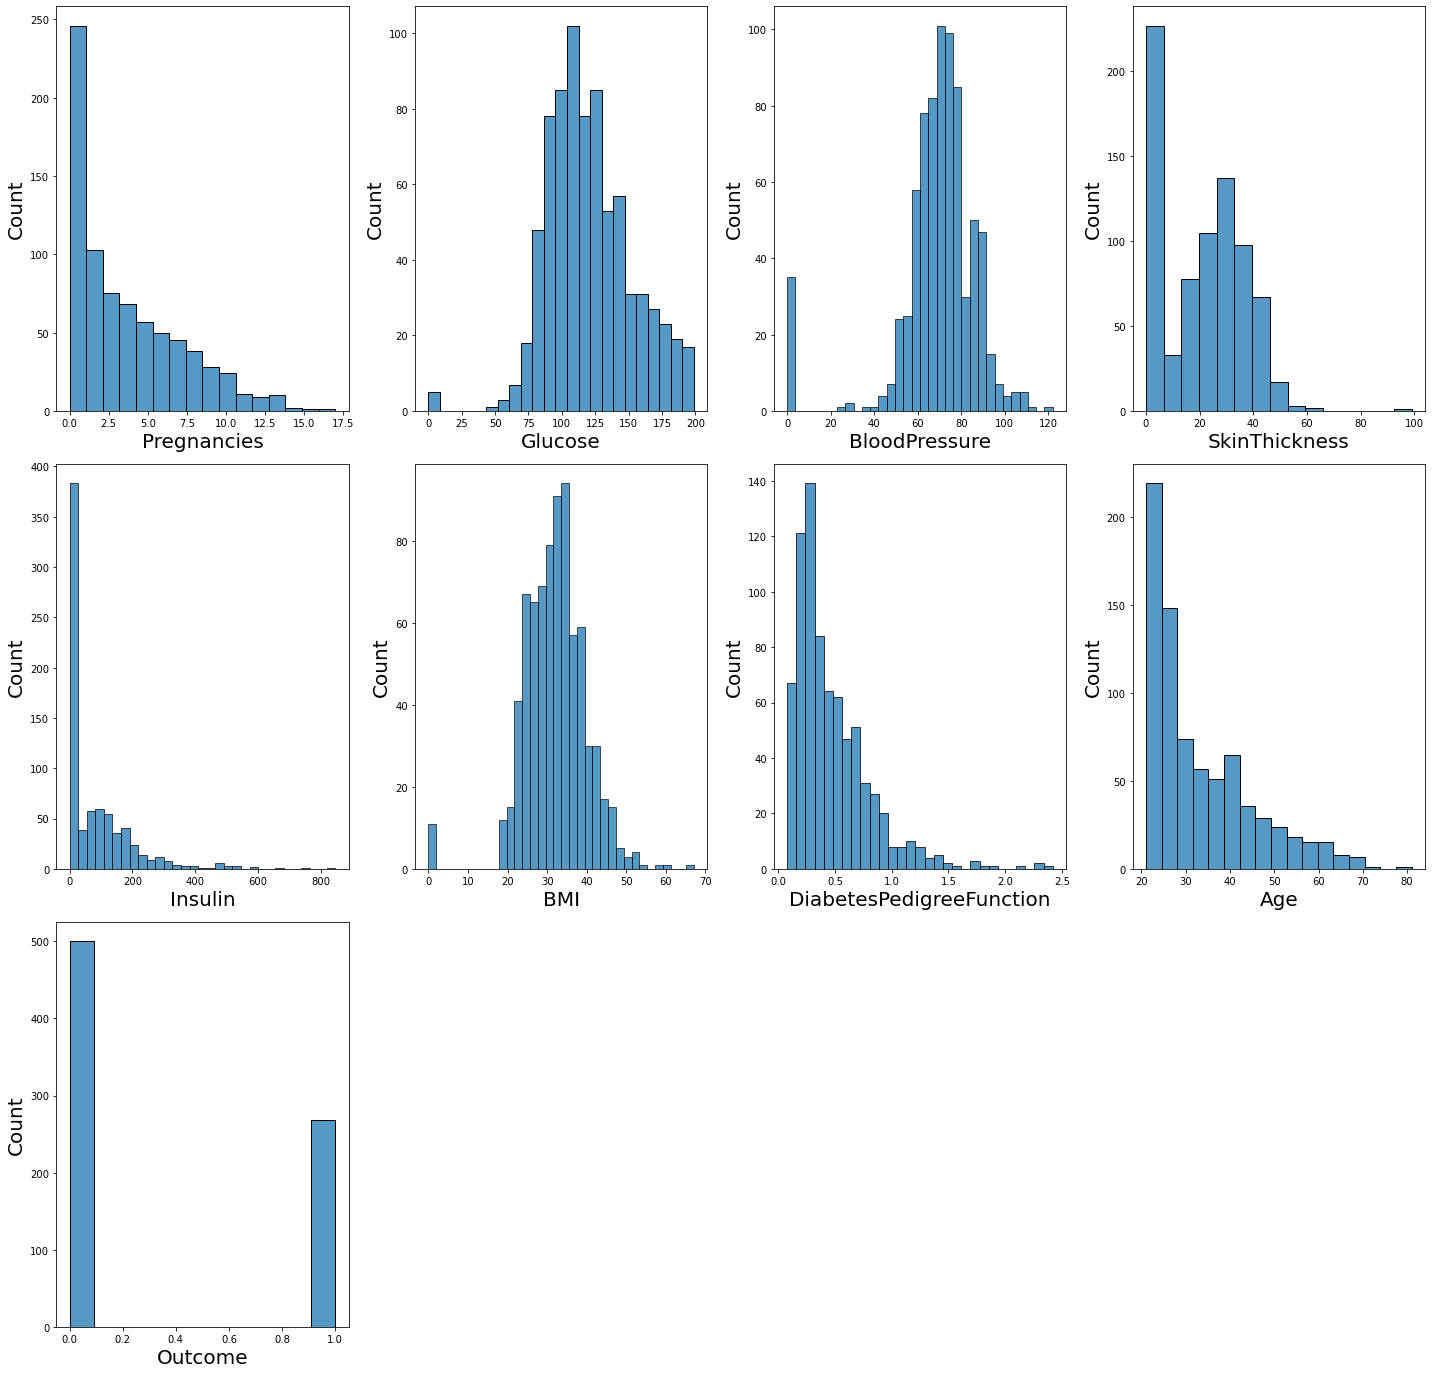

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [11]:
for column in data:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


### Task:1) EDA analysis for univariate and bivariate 
   ### 2) domain analysis

In [12]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

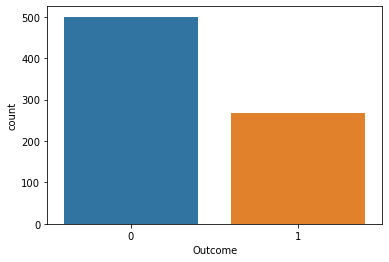

In [13]:
##Univariate analysis
sns.countplot(x='Outcome',data=data)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

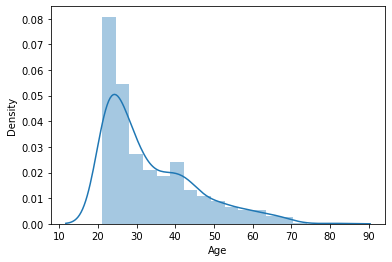

In [14]:
sns.distplot(data['Age'].dropna(),kde=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

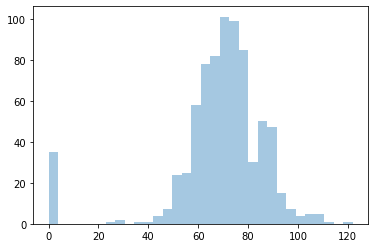

In [15]:
sns.distplot(x=data.BloodPressure,kde=False)

<AxesSubplot:xlabel='Age', ylabel='Count'>

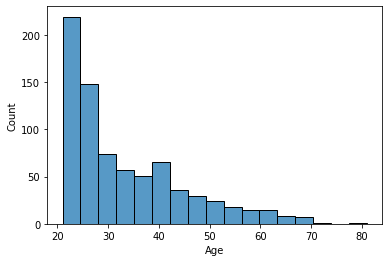

In [16]:
sns.histplot(x='Age',data=data)

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

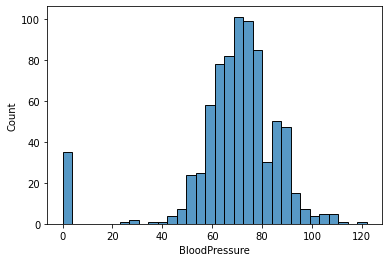

In [17]:
sns.histplot(x='BloodPressure',data=data)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

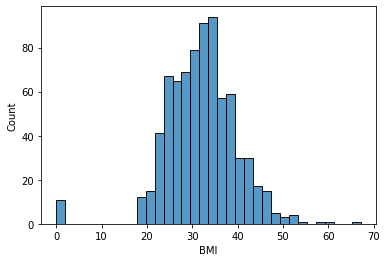

In [18]:
sns.histplot(x='BMI',data=data)

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

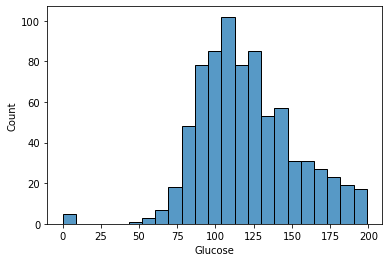

In [19]:
sns.histplot(x='Glucose',data=data)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

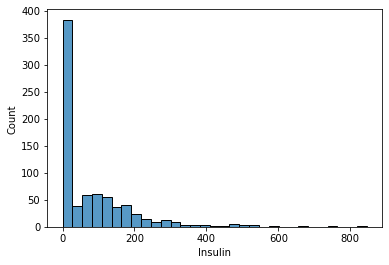

In [20]:
sns.histplot(x='Insulin',data=data)

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

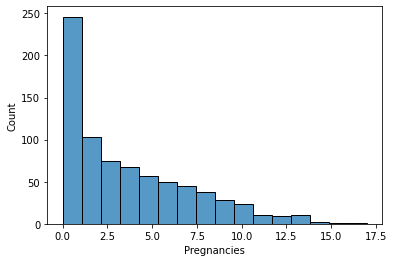

In [21]:
sns.histplot(x='Pregnancies',data=data)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

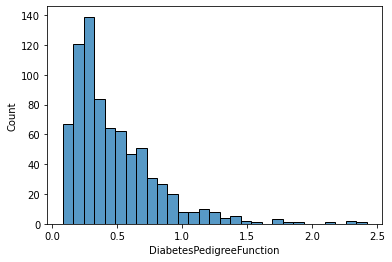

In [22]:
sns.histplot(x='DiabetesPedigreeFunction',data=data)

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

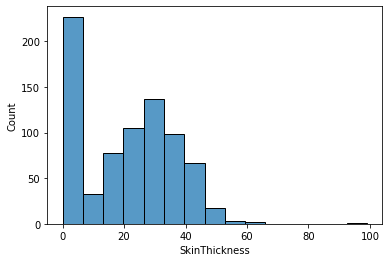

In [23]:
sns.histplot(x='SkinThickness',data=data)

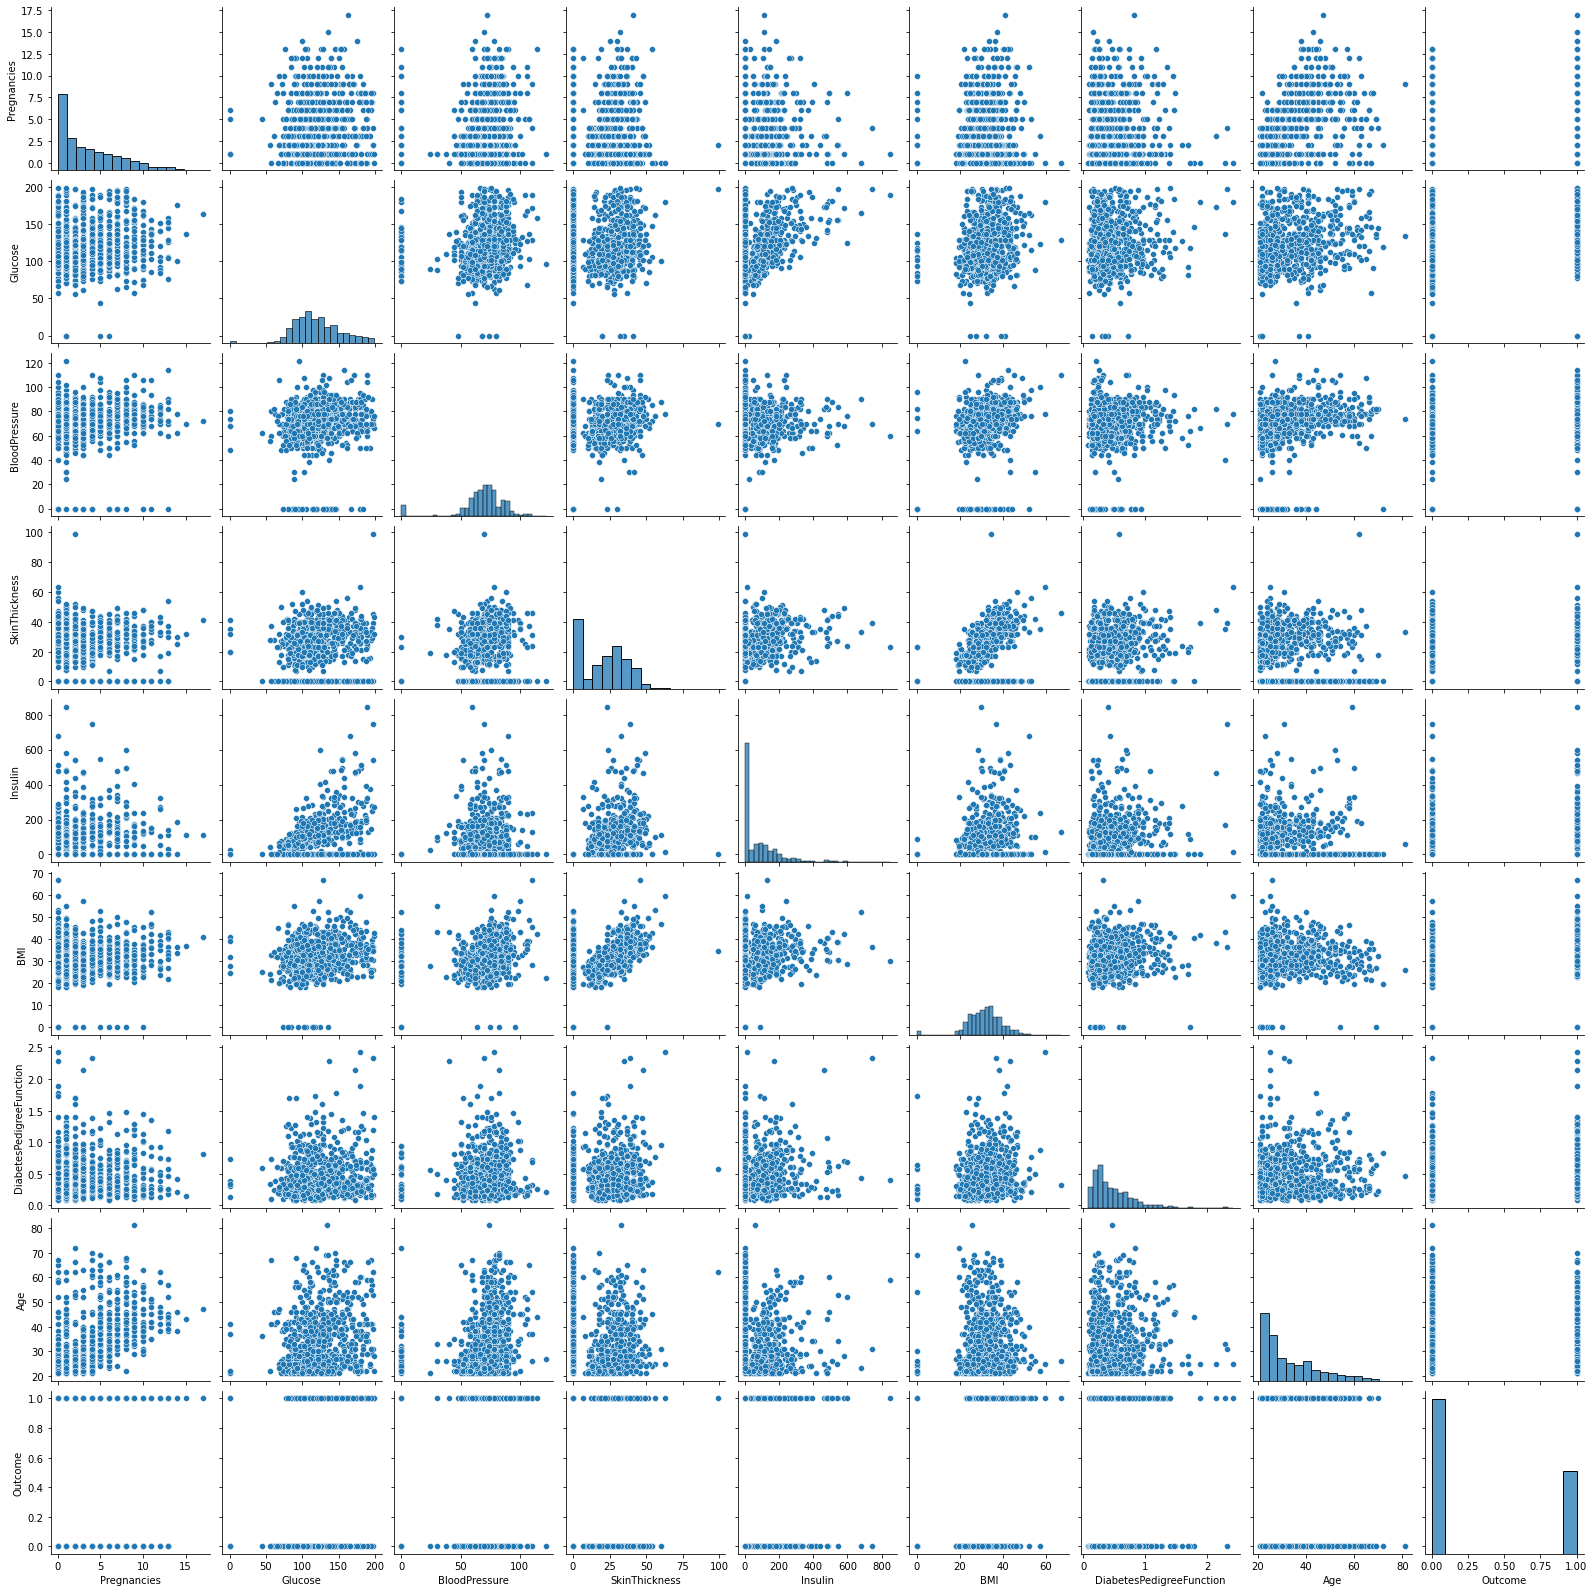

In [24]:
sns.pairplot(data)

<AxesSubplot:xlabel='Age'>

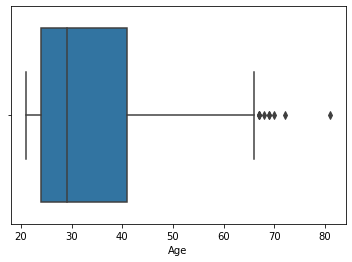

In [25]:

sns.boxplot(x='Age',data=data)
#Outlier is present

<AxesSubplot:xlabel='BMI'>

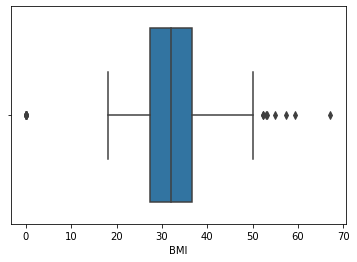

In [26]:
sns.boxplot(x='BMI',data=data)
#Outlier is present

<AxesSubplot:xlabel='Pregnancies'>

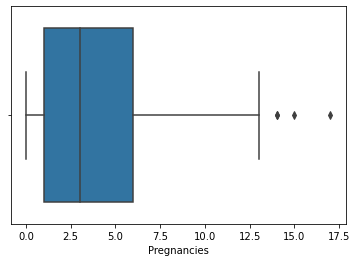

In [27]:
sns.boxplot(x='Pregnancies',data=data)
#Outlier is present

<AxesSubplot:xlabel='Glucose'>

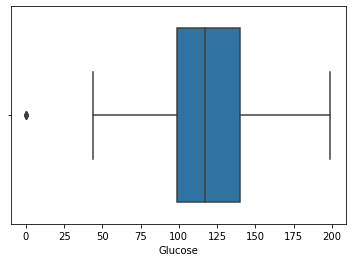

In [28]:
sns.boxplot(x='Glucose',data=data)
#Outlier is present

<AxesSubplot:xlabel='Insulin'>

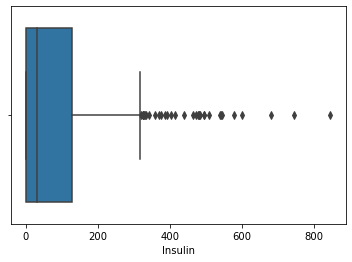

In [29]:
sns.boxplot(x='Insulin',data=data)
#Outlier is present

<AxesSubplot:xlabel='SkinThickness'>

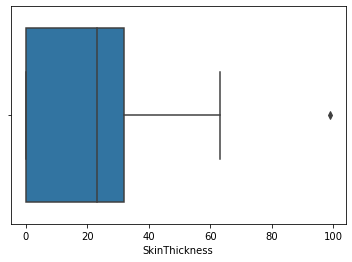

In [30]:
sns.boxplot(x='SkinThickness',data=data)
#Outlier is present

<AxesSubplot:xlabel='BloodPressure'>

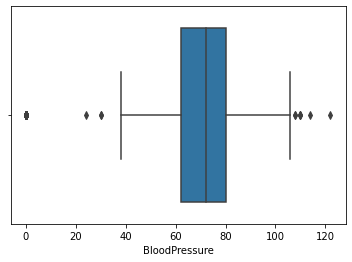

In [31]:
sns.boxplot(x='BloodPressure',data=data)
#Outlier is present

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

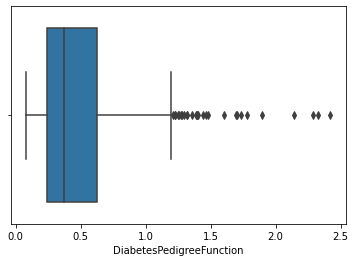

In [32]:
sns.boxplot(x='DiabetesPedigreeFunction',data=data)
#Outlier is present

<AxesSubplot:>

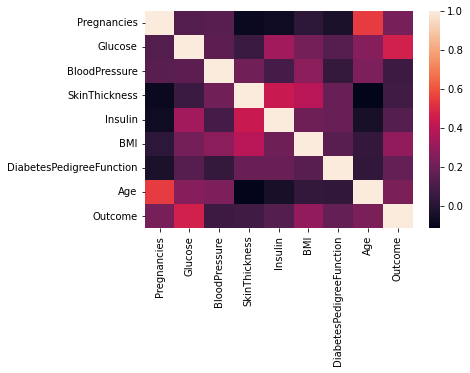

In [33]:
sns.heatmap(data.corr())

In [34]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


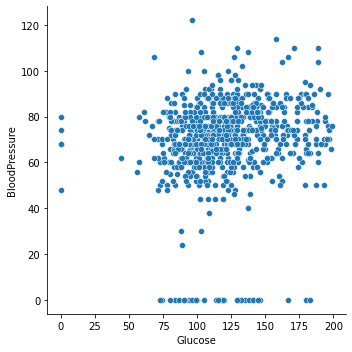

In [35]:
sns.relplot(x='Glucose',y='BloodPressure',data=data)

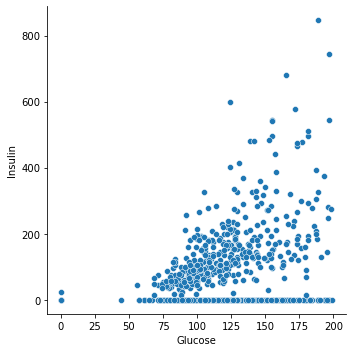

In [36]:
sns.relplot(x='Glucose',y='Insulin',data=data)

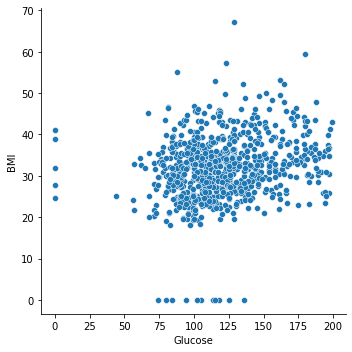

In [37]:
sns.relplot(x='Glucose',y='BMI',data=data)

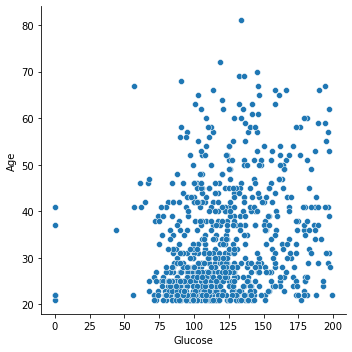

In [38]:
sns.relplot(x='Glucose',y='Age',data=data)

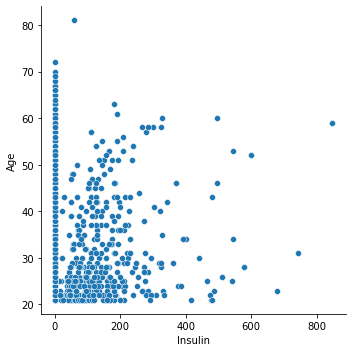

In [39]:
sns.relplot(x='Insulin',y='Age',data=data)

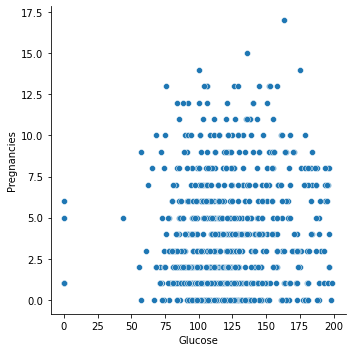

In [40]:
sns.relplot(x='Glucose',y='Pregnancies',data=data)

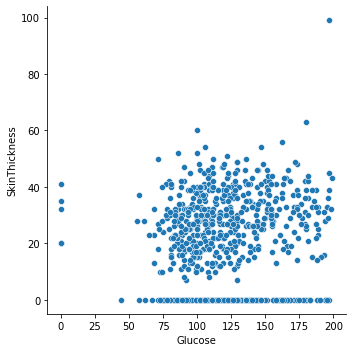

In [41]:
sns.relplot(x='Glucose',y='SkinThickness',data=data)

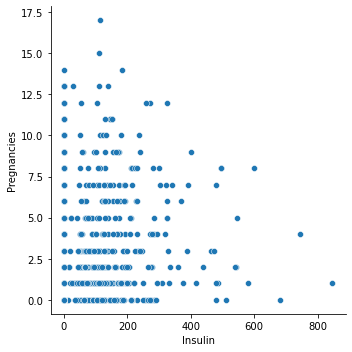

In [42]:
sns.relplot(x='Insulin',y='Pregnancies',data=data)

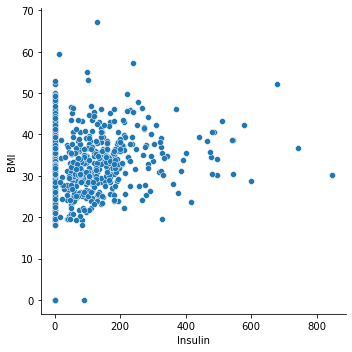

In [43]:
sns.relplot(x='Insulin',y='BMI',data=data)

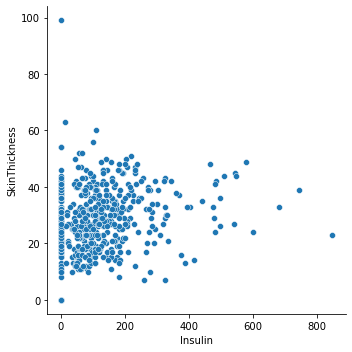

In [44]:
sns.relplot(x='Insulin',y='SkinThickness',data=data)

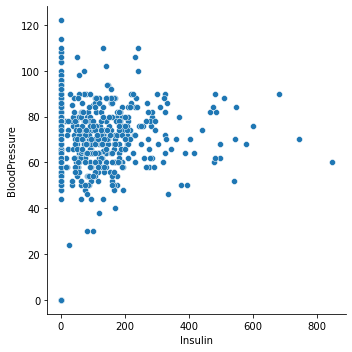

In [45]:
sns.relplot(x='Insulin',y='BloodPressure',data=data)

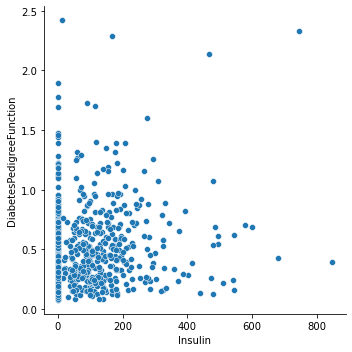

In [46]:
sns.relplot(x='Insulin',y='DiabetesPedigreeFunction',data=data)

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

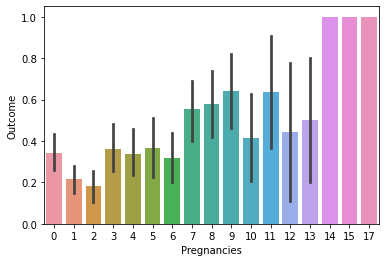

In [47]:
sns.barplot(x='Pregnancies',y='Outcome',data=data)

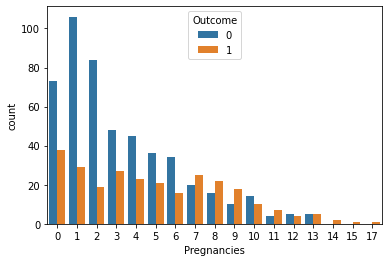

In [48]:
##Bivariate analysis refers to plots between input variables and target variables
##Analyzing how pregnancies impact the patient with diabetes
sns.countplot(x='Pregnancies',hue='Outcome',data=data)
plt.show()

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

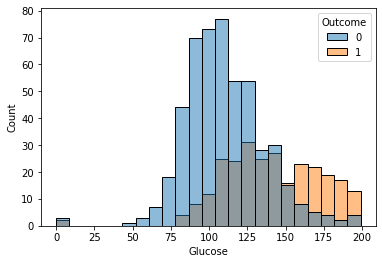

In [49]:
##Analysing the relationship between diabetes and glucose
sns.histplot(x='Glucose',hue='Outcome',data=data)

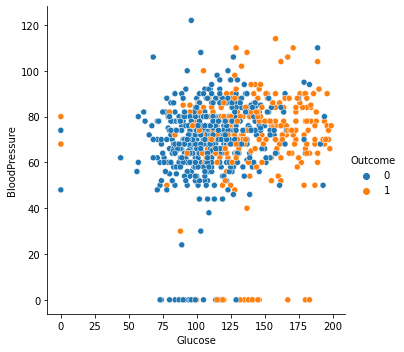

In [50]:
##Analyse glucose with Blood pressure
sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)

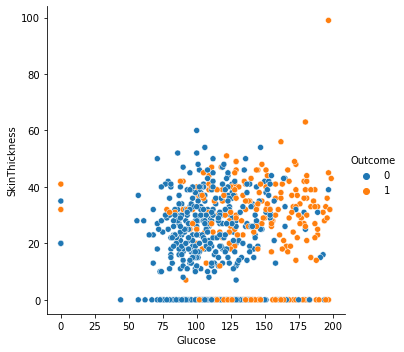

In [51]:
##Analyse glucose with Skin thickness
sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)

There seem to be no defined relationship between glucose and skin thickness as far as diabetes is concerned from given data.Thus we need other features to get the relation.

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

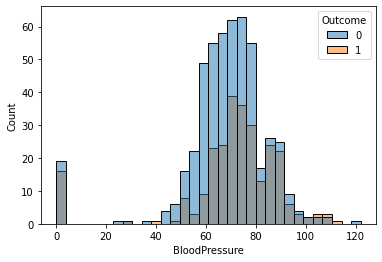

In [52]:
sns.histplot(x='BloodPressure',hue='Outcome',data=data)

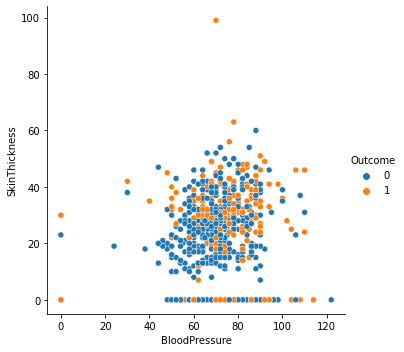

In [53]:
## Analyse BP with skin thickness
sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)

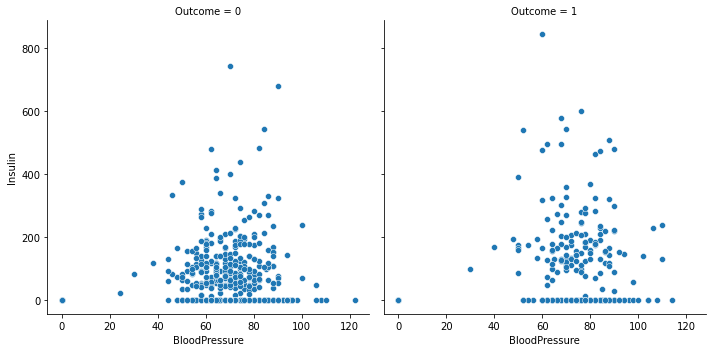

In [54]:
##Analysing BP with Insulin
sns.relplot(x='BloodPressure',y='Insulin',col='Outcome',data=data)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

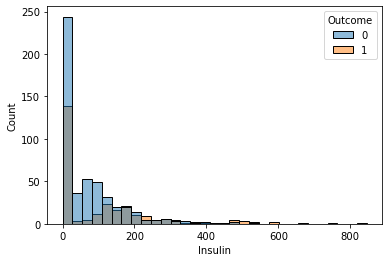

In [55]:
sns.histplot(x='Insulin',hue='Outcome',data=data)

## Data Preprocessing and Feature Engineering

In [56]:
#Step1: Handling the missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#Step2: Handling the corrupted data.
## In Glucose , Blood pressure, Insulin,BMI certain datapoints are 0
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)
##dataframe.column.replace('Value to be replaced','By what value')

In [ ]:
data.loc[data['Glucose']==0]

In [17]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [ ]:
## Step3: Numerical representation of string data

In [ ]:
##Step4: Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [13]:
##Step5: Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
d1=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(d1,axis=1))

In [ ]:
data1

In [14]:
con_data=data[['Pregnancies','Outcome']]

In [15]:
type(data1)
data2=pd.DataFrame(data1,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DataPedigreeFunction','Age'])

In [16]:
final_df=pd.concat([data2,con_data],axis=1)
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DataPedigreeFunction,Age,Pregnancies,Outcome
0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,6,1
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,1,0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,8,1
3,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1,0
4,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,10,0
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,2,0
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,5,0
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1,1


## Feature selection

In [ ]:
## No redundant features
## We will check correlation
sns.heatmap(data2.corr(),annot=True)

#So no correlation hence no features is dropped


## Model creation

In [17]:
##Step1: Creating dependent and independent variables
x=final_df.iloc[:,:-1]
y=final_df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
##Step 2: Creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
## Step3: Model creation

In [19]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)  ##training

LogisticRegression()

In [20]:
##Step4: Prediction
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
y_pred_prob=clf.predict_proba(x_test)   ##prob=probability
y_pred_prob

array([[0.40396934, 0.59603066],
       [0.86315846, 0.13684154],
       [0.73464293, 0.26535707],
       [0.57500928, 0.42499072],
       [0.81700889, 0.18299111],
       [0.8138767 , 0.1861233 ],
       [0.60790697, 0.39209303],
       [0.90247533, 0.09752467],
       [0.41499772, 0.58500228],
       [0.8865757 , 0.1134243 ],
       [0.32293222, 0.67706778],
       [0.52333877, 0.47666123],
       [0.89975017, 0.10024983],
       [0.45879613, 0.54120387],
       [0.7345018 , 0.2654982 ],
       [0.88326148, 0.11673852],
       [0.09910458, 0.90089542],
       [0.61434606, 0.38565394],
       [0.38594959, 0.61405041],
       [0.89940112, 0.10059888],
       [0.55121462, 0.44878538],
       [0.72766568, 0.27233432],
       [0.53507574, 0.46492426],
       [0.82996483, 0.17003517],
       [0.98523683, 0.01476317],
       [0.32530857, 0.67469143],
       [0.8413539 , 0.1586461 ],
       [0.30746269, 0.69253731],
       [0.22094102, 0.77905898],
       [0.80876687, 0.19123313],
       [0.

## Evaluation of model

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [32]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[113  17]
 [ 31  31]]


In [33]:
recall=recall_score(y_test,y_pred)
recall

0.5

In [34]:
precision=precision_score(y_test,y_pred)
precision

0.6458333333333334

In [35]:
f1score=f1_score(y_test,y_pred)
f1score

0.5636363636363636

In [36]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       130
           1       0.65      0.50      0.56        62

    accuracy                           0.75       192
   macro avg       0.72      0.68      0.69       192
weighted avg       0.74      0.75      0.74       192



In [37]:
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

## Multiclass Classification

In [23]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
## Model creation
x=df.iloc[:,:-1]
y=df.Name

In [25]:
## Training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=25)

In [8]:
x_train

,SepalLength,SepalWidth,PetalLength,PetalWidth
23,5.1,3.3,1.7,0.5
35,5.0,3.2,1.2,0.2
16,5.4,3.9,1.3,0.4
0,5.1,3.5,1.4,0.2
8,4.4,2.9,1.4,0.2
...,...,...,...,...
118,7.7,2.6,6.9,2.3
61,5.9,3.0,4.2,1.5
143,6.8,3.2,5.9,2.3
62,6.0,2.2,4.0,1.0


In [46]:
y_train

23         Iris-setosa
35         Iris-setosa
16         Iris-setosa
0          Iris-setosa
8          Iris-setosa
            ...       
118     Iris-virginica
61     Iris-versicolor
143     Iris-virginica
62     Iris-versicolor
132     Iris-virginica
Name: Name, Length: 112, dtype: object

In [30]:
from sklearn.linear_model import LogisticRegression
lr_multi=LogisticRegression()
lr_multi.fit(x_train,y_train)
y_pred=lr_multi.predict(x_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 15  1]
 [ 0  0 11]]


In [32]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.9736842105263158

In [33]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.975877192982456

In [34]:
f1score=f1_score(y_test,y_pred,average='weighted')
f1score

0.973831844688861

In [35]:
cr=classification_report(y_test,y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

